In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import statistics
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
from itertools import permutations
from sklearn.preprocessing import RobustScaler
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA

            X         Y
0    1.298763  0.000000
1    1.085821  0.077718
2    1.153553  0.178955
3    1.409880  0.289738
4    1.374267  0.265983
..        ...       ...
395 -0.395586  0.672792
396 -0.585404  0.864934
397 -0.635865  0.821904
398 -0.661343  0.751106
399 -0.682225  0.682225

[400 rows x 2 columns]

No of samples : 400
No of features(dimensions) : 2


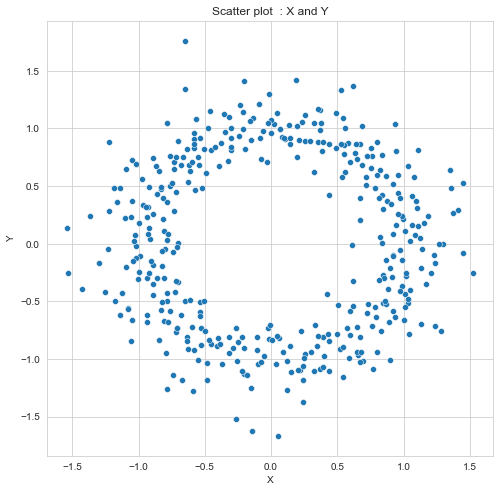

In [2]:
np.random.seed(42)

n_samples = 100
n_blades = 4

theta = np.linspace(0, 2 * np.pi, n_samples)
r_noise = 0.15 * np.random.randn(n_samples)
r = 1 + r_noise

x = np.array([])
y = np.array([])

for blade in range(n_blades):
    blade_theta = theta + blade * np.pi / n_blades
    blade_x = r * np.cos(blade_theta)
    blade_y = r * np.sin(blade_theta)

    # Make one blade unevenly longer
    if blade == 0:
        blade_x *= 1 + (0.5 * np.random.rand(n_samples))
        blade_y *= 1 + (0.5 * np.random.rand(n_samples))

    x = np.concatenate((x, blade_x))
    y = np.concatenate((y, blade_y))

# Combine x and y as a dataset
shuriken_data = np.column_stack((x, y))
og_data = pd.DataFrame({'X': shuriken_data[:, 0], 'Y': shuriken_data[:, 1]})
s_row, s_col = og_data.shape
cols = list(og_data.columns)

# Print the DataFrame
print(og_data)
print(f'\nNo of samples : {s_row}\nNo of features(dimensions) : {s_col}')

# Set up Seaborn plotting style
sns.set_style("whitegrid")

# Set the figure size
plt.figure(figsize=(8, 8))

# Plot the dataset using Seaborn
sns.scatterplot(x=shuriken_data[:, 0], y=shuriken_data[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title('Scatter plot  : X and Y')
plt.show()

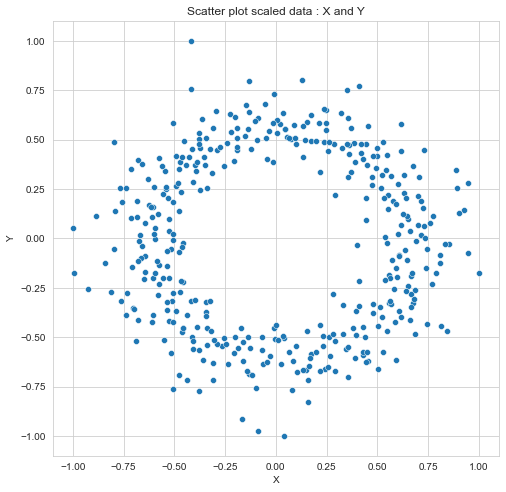

In [6]:
# Scale Data

# ----- Min-Max -----

scaler = MinMaxScaler(feature_range=(-1, 1))
x = pd.DataFrame(scaler.fit_transform(og_data))
x.columns = cols

# ----- Robust Scaler -----

#scaler = RobustScaler()
#x = pd.DataFrame(scaler.fit_transform(og_data))
#x.columns = cols

# ----- Yeo-Johnson -----

#transformer = PowerTransformer(method='yeo-johnson')
#x = pd.DataFrame(transformer.fit_transform(og_data))
#x.columns = cols

# Set the figure size
plt.figure(figsize=(8, 8))
# Create a scatter plot
sns.scatterplot(x=x['X'], y=x['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.title('Scatter plot scaled data : X and Y')
plt.show()

In [4]:
# Fit PCA to the data and transform the data to 1 dimension
pca = PCA(n_components=1)
X_pca = pca.fit_transform(x)

# Print the eigenvalues and eigenvectors
print("Eigenvalues:", pca.explained_variance_)
print("Eigenvectors:\n", pca.components_)

Eigenvalues: [0.24270356]
Eigenvectors:
 [[-0.99999456  0.0032972 ]]


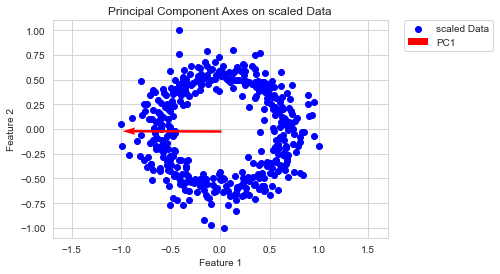

In [9]:
# Calculate the end points of the PC axes (scaled by the square root of the absolute eigenvalues)
pc_endpoints = pca.components_.T * pca.explained_variance_

# Plot the original standardized data points
plt.scatter(x['X'], x['Y'], label='scaled Data', color='blue')

# Plot the PC axes on the original standardized data
#origin = pca.mean_
#arrow_scale = 2
#arrow_width = 0.004
#plt.quiver(*origin, *pc_endpoints[:, 0], label='PC1', color='red',scale=arrow_scale, width=arrow_width)
#plt.quiver(*origin, *pc_endpoints[:, 1], label='PC2', color='green',scale=arrow_scale, width=arrow_width)

origin = pca.mean_
for i, (endpoint, var) in enumerate(zip(pc_endpoints.T, pca.explained_variance_)):
    plt.quiver(*origin, *endpoint, scale=var, scale_units='xy', angles='xy', label=f'PC{i+1}', color=['red', 'green'][i])

# Customize the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Principal Component Axes on scaled Data')
plt.grid(True)
plt.axis('equal')
plt.show()

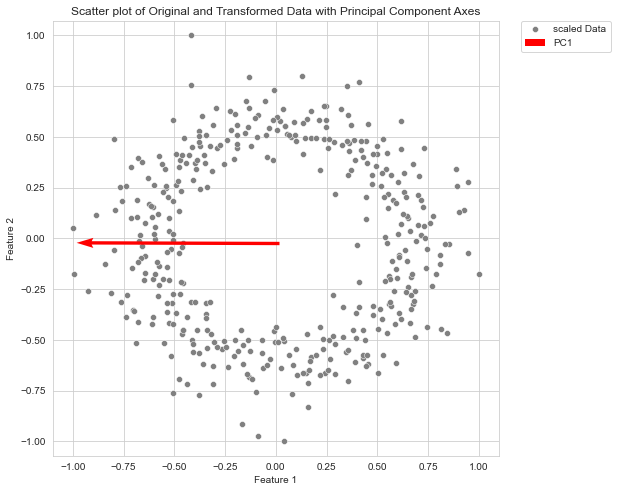

In [15]:
# Calculate the end points of the PC axes (scaled by the square root of the absolute eigenvalues)
pc_endpoints = pca.components_.T * pca.explained_variance_

# Set the figure size
plt.figure(figsize=(8, 8))

# Plot the original standardized data points
sns.scatterplot(x=x['X'], y=x['Y'], label='scaled Data', color='grey')

# Plot the transformed data points
#transformed_y = [0] * len(X_pca)
#sns.scatterplot(x=X_pca[0], y=transformed_y, label='Transformed Data', color='orange', alpha=0.5)

origin = pca.mean_
arrow_scale = 2
arrow_width = 0.004
for i, (endpoint, var) in enumerate(zip(pc_endpoints.T, pca.explained_variance_)):
    plt.quiver(*origin, *endpoint, scale=var, scale_units='xy', angles='xy', label=f'PC{i+1}', color=['red', 'green'][i])
    
# Customize the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Scatter plot of Original and Transformed Data with Principal Component Axes')
plt.grid(True)
plt.axis('equal')
plt.show()